## Required imports

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [7]:
import os
os.listdir("/content/drive/MyDrive/potato_dataset/dataset")

['Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight']

In [8]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/potato_dataset/dataset",
    seed=123,
    shuffle=True,
    image_size=(256,256),
    batch_size=32
)

names = dataset.class_names
names
len(dataset)

Found 2152 files belonging to 3 classes.


68

In [9]:
len(dataset)
for image_batch,label_batch in dataset.take(1):
  print(image_batch[0].shape)  # tensor of 1st images
  print(image_batch[0].numpy)  # numpy

  print(label_batch.numpy()) # class for 32 images(category)

(256, 256, 3)
<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[142., 116., 117.],
        [137., 111., 112.],
        [107.,  81.,  82.],
        ...,
        [173., 155., 151.],
        [182., 164., 160.],
        [196., 178., 174.]],

       [[138., 112., 113.],
        [137., 111., 112.],
        [132., 106., 107.],
        ...,
        [175., 157., 153.],
        [177., 159., 155.],
        [185., 167., 163.]],

       [[117.,  91.,  92.],
        [112.,  86.,  87.],
        [144., 118., 119.],
        ...,
        [176., 158., 154.],
        [176., 158., 154.],
        [181., 163., 159.]],

       ...,

       [[107.,  81.,  80.],
        [146., 120., 119.],
        [126., 100.,  99.],
        ...,
        [163., 143., 142.],
        [167., 147., 146.],
        [171., 151., 150.]],

       [[115.,  89.,  88.],
        [124.,  98.,  97.],
        [160., 134., 133.],
        ...,
        [161., 141., 140.],
        [165., 145., 

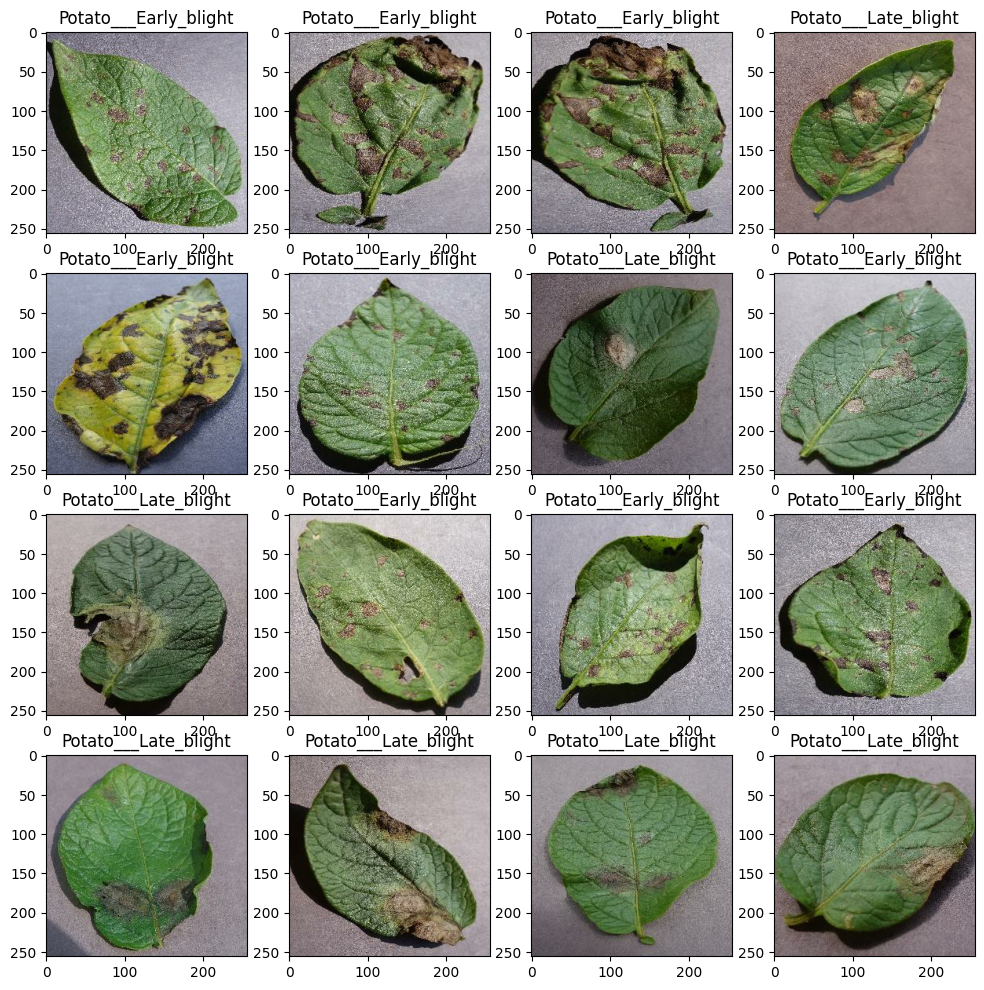

In [10]:
plt.figure(figsize=(12,12))
for image_batch,label_batch in dataset.take(1): # for first batch
  for i in range(16):
    ax = plt.subplot(4,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(names[label_batch[i]])


80:10:10

train:validate:test

In [11]:
# Spliting the dataset
train_size = 0.8
val_size = 0.1
test_size = 0.1

# print(len(dataset)*train_size)
# print(len(dataset)*val_size)
# print(len(dataset)*test_size)
train_ds = dataset.take(int(len(dataset)*train_size))

test_ds = dataset.skip(int(len(dataset)*train_size))
val_ds = int(len(dataset)*val_size)

print(len(train_ds))
print(len(test_ds))


54
14


In [12]:
def dataset_split(ds,train_split= 0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
  ds_size = len(ds)

  if shuffle:
    ds = ds.shuffle(shuffle_size,seed=12)

  train_size = int(ds_size*train_split)
  val_size = int(ds_size*val_split)

  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)


  return train_ds,val_ds,test_ds

In [13]:
train_ds, val_ds,test_ds = dataset_split(dataset)

print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

54
6
8


In [14]:
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
input_shape = (256,256,3)

resize_scale = tf.keras.Sequential([
    layers.Resizing(256,256,input_shape=input_shape ),
    layers.Rescaling(1./255),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
# data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

In [16]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

CNN architecture

In [17]:
input_shape = (256,256,3)
n_classes = 3

import keras

model = keras.Sequential([
    resize_scale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(3,activation='softmax'),
])
# model.build(input_shape=input_shape)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         802,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 896,323 (3.42 MB)

 Trainable params: 896,323 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('my_model.keras',monitor='val_accuracy',save_best_only=True, mode = 'max')

training = model.fit(
    train_ds,
    batch_size=32,
    validation_data=val_ds,
    epochs=20,
    verbose=1,
    callbacks=[checkpoint]
)

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 441s 5s/step - accuracy: 0.5169 - loss: 0.8738 - val_accuracy: 0.6771 - val_loss: 0.9438
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 262s 5s/step - accuracy: 0.8036 - loss: 0.4789 - val_accuracy: 0.7760 - val_loss: 0.4710
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 278s 5s/step - accuracy: 0.8287 - loss: 0.4026 - val_accuracy: 0.7656 - val_loss: 0.7008
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 318s 5s/step - accuracy: 0.8534 - loss: 0.3519 - val_accuracy: 0.8802 - val_loss: 0.2951
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 327s 5s/step - accuracy: 0.9196 - loss: 0.2221 - val_accuracy: 0.9115 - val_loss: 0.2307
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 274s 5s/step - accuracy: 0.9455 - loss: 0.1776 - val_accuracy: 0.8854 - val_loss: 0.2753
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 286s 5s/step - accuracy: 0.8601 - loss: 0.3194 - val_accuracy: 0.9010 - val_loss: 0.2645
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 309s 5s/step - accuracy: 0.9406 - loss: 0.1567 - val_accuracy: 0.8125 - v

In [ ]:
## Issues with the fluctions in accuracy and loss
1. Dataset imbalalnce: One class domniates the other
2. Overfitting
3. Data augmentation: augmentation techniques introduces significant variation and model struggle to genralize it

In [21]:
scores = model.evaluate(test_ds)


8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9644 - loss: 0.1162


In [22]:
training.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [23]:
acc=training.history['accuracy']
val_acc=training.history['val_accuracy']
loss=training.history['loss']
val_loss=training.history['val_loss']


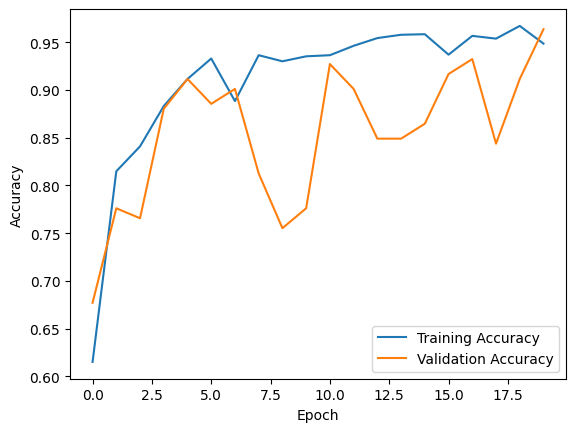

In [24]:
# plt.figure(figsize=(8,8))
# plt.subplot(1,2,1)
# plt.plot(range(5),acc,label='Training Accuracy')
# plt.plot(range(5),val_acc,label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

plt.plot(acc,label='Training Accuracy')
plt.plot(val_acc,label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# plt.subplot(1,2,2)
# plt.plot(range(5),loss,label='Training Loss')
# plt.plot(range(5),val_loss,label='Validation Loss')
# plt.legend(loc='upper right')

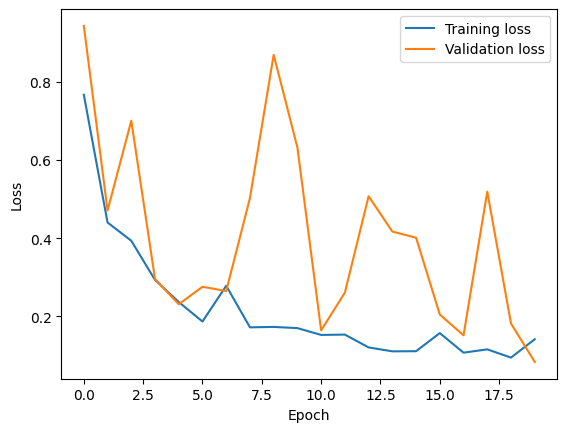

In [25]:
plt.plot(loss,label='Training loss')
plt.plot(val_loss,label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


### Predict

In [ ]:
best_model = load_model('my_model.keras')

first image to predict
first image actual label::  Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[3.7922751e-04 9.9962085e-01 8.2179805e-17]
predicted label is::  Potato___Late_blight


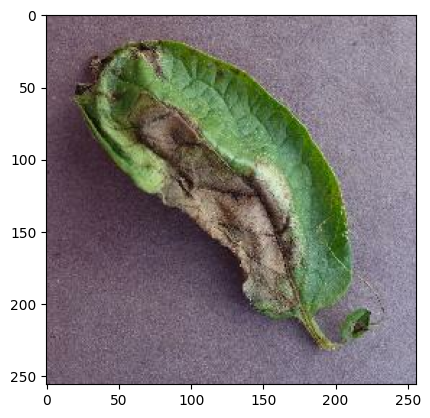

In [26]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
  first_image=images_batch[0].numpy().astype('uint8')
  first_label=labels_batch[0].numpy()
  print("first image to predict")
  plt.imshow(first_image)
  print("first image actual label:: ",names[first_label])

  batch_prediction=model.predict(images_batch)
  print((batch_prediction[0]))
  print("predicted label is:: ",names[np.argmax(batch_prediction[0])])


In [27]:
def predict(model,img):
  img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array=tf.expand_dims(img_array,0) #creating batch

  predictions=model.predict(img_array)

  predicted_class=names[np.argmax(predictions[0])]
  confidence=round(100*(np.max(predictions[0])),2)
  return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


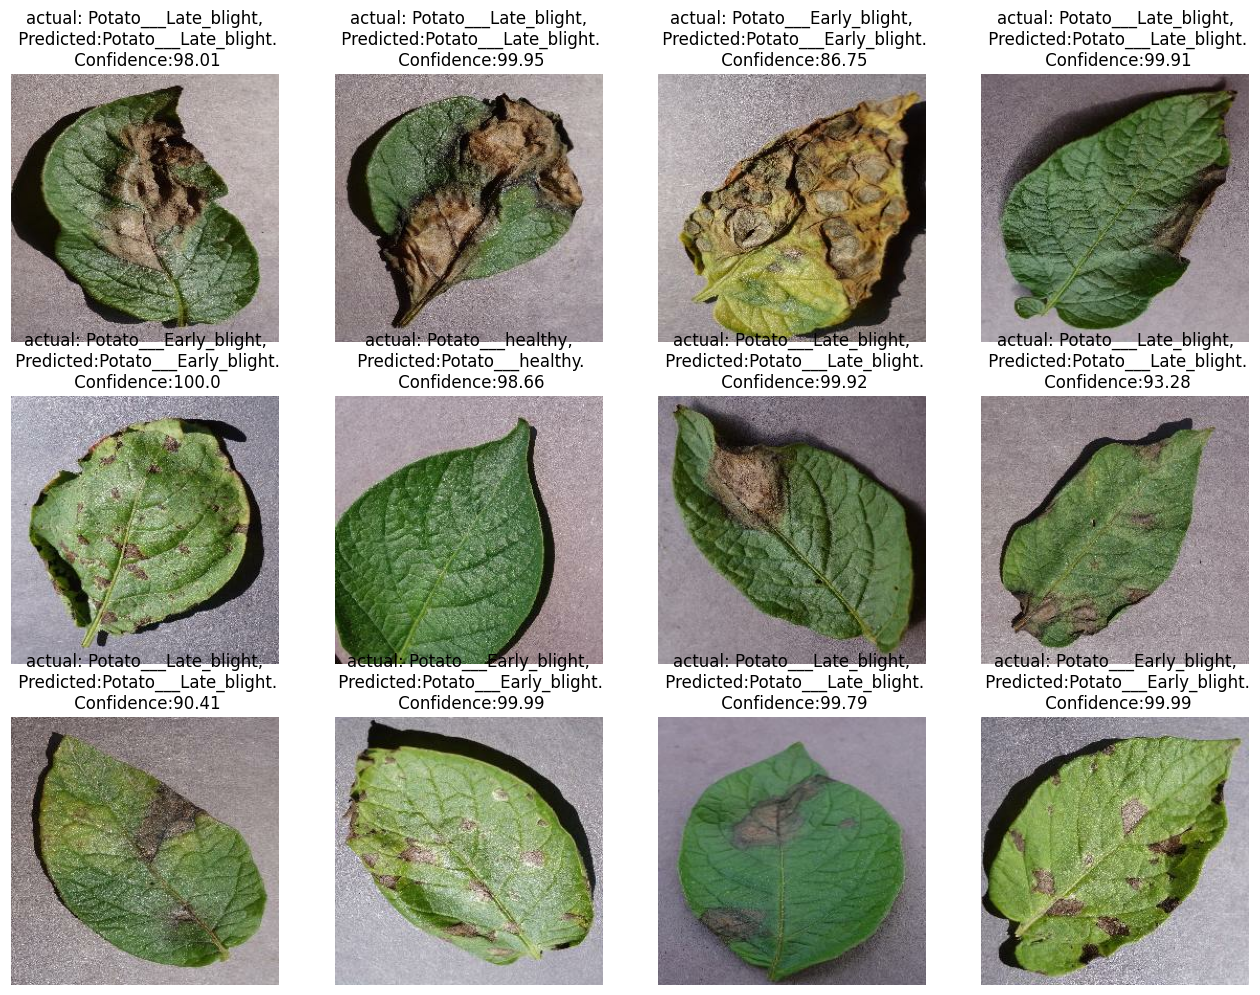

In [30]:
plt.figure(figsize=(16,16))
for images, labels in test_ds.take(1):
  for i in range(12):
    ax=plt.subplot(4,4,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")
    actual_class = names[labels[i].numpy()]  # Get the actual class label and convert it to the class name
    predicted_class, confidence = predict(model, images[i].numpy())
    plt.title(f"actual: {actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence}")
    predicted_class,confidence=predict(model,images[i].numpy())



In [ ]:
model_version=1
model.save(f"/content/drive/MyDrive/potato_dataset/models/model_{model_version}.keras")


In [ ]:
import os
model_version=max([int(i.split('_')[1].split('.')[0]) for i in os.listdir("/content/drive/MyDrive/potato_dataset/models") if i.startswith("model_") ]+[0])+1
model.save(f"/content/drive/MyDrive/potato_dataset/models/model_{model_version}.keras")